# **Import libraries**

In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from time import time
import numpy as np
import pandas as pd
import seaborn as sns

# **Load Student performance data**

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/static/public/320/data.csv')
print("Dataset Head:")
print(df.head())

Dataset Head:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]


# Exploratory data analysis

## Data characteristics

To understand the shape of data, data type, missingness, unique entries for each feature and label, and distribution of each unique entries.

In [3]:
# Create label data
df['Target'] = pd.cut(df['G3'], bins=[-1, 9, 11, 13, 15, 20], labels=['F', 'D', 'C', 'B', 'A'])

# Check the distribution of the label data
print("\nLabel Distribution:")
print(pd.crosstab(df['Target'], df['G3']))



Label Distribution:
G3      0   1   5   6   7   8   9   10   11  12  13  14  15  16  17  18  19
Target                                                                     
F       15   1   1   3  10  35  35   0    0   0   0   0   0   0   0   0   0
D        0   0   0   0   0   0   0  97  104   0   0   0   0   0   0   0   0
C        0   0   0   0   0   0   0   0    0  72  82   0   0   0   0   0   0
B        0   0   0   0   0   0   0   0    0   0   0  63  49   0   0   0   0
A        0   0   0   0   0   0   0   0    0   0   0   0   0  36  29  15   2


In [4]:

# Display basic information about the dataset
print("Basic Information:")
df.info()

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Display unique values in each column
print("\nUnique Entries:")
for col in df:
    print(col)
    print(df[col].unique())
    print('\n')

# Display the frequency of each unique values in each column
print("\nFrequency of Unique Entries:")
for col in df:
    print(f"\nFrequency of values in {col}:")
    print(df[col].value_counts())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      649 non-null    object  
 1   sex         649 non-null    object  
 2   age         649 non-null    int64   
 3   address     649 non-null    object  
 4   famsize     649 non-null    object  
 5   Pstatus     649 non-null    object  
 6   Medu        649 non-null    int64   
 7   Fedu        649 non-null    int64   
 8   Mjob        649 non-null    object  
 9   Fjob        649 non-null    object  
 10  reason      649 non-null    object  
 11  guardian    649 non-null    object  
 12  traveltime  649 non-null    int64   
 13  studytime   649 non-null    int64   
 14  failures    649 non-null    int64   
 15  schoolsup   649 non-null    object  
 16  famsup      649 non-null    object  
 17  paid        649 non-null    object  
 18  activities  649 non-null    obj

## Segregate data

In [5]:
# Segregate the data base on its type
cat = [
    "Mjob", 
    "Fjob",
    "reason",
    "guardian",
    "traveltime",
    "studytime",
    "failures"
]

bin = [
    "school", 
    "sex",
    "address",
    "famsize", 
    "Pstatus", 
    "schoolsup",
    "famsup",
    "paid",
    "activities",
    "nursery",
    "higher",
    "internet",
    "romantic"
]

ord = [
    "Medu",
    "Fedu",
    "famrel",
    "freetime",
    "goout",
    "Dalc",
    "Walc",
    "health"
]

# Segreate the data
df_cat = df[cat + ['Target']]
df_bin = df[bin + ['Target']]
df_ord = df[ord + ['Target']]
df_num = df.drop(columns=cat+bin+ord+['G3'])



## Visualize data

Understand the distribution of example countes for each features and label.

### Categorical variables (more than 2 categories)

/var/folders/tz/gs_7p8rj7tz_vx4snsdf_c2m0000gp/T/ipykernel_5479/2814419627.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['Target', col]).size().reset_index(name="count")
/var/folders/tz/gs_7p8rj7tz_vx4snsdf_c2m0000gp/T/ipykernel_5479/2814419627.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Target_totals = df.groupby('Target').size().reset_index(name="total")
/var/folders/tz/gs_7p8rj7tz_vx4snsdf_c2m0000gp/T/ipykernel_5479/2814419627.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False t

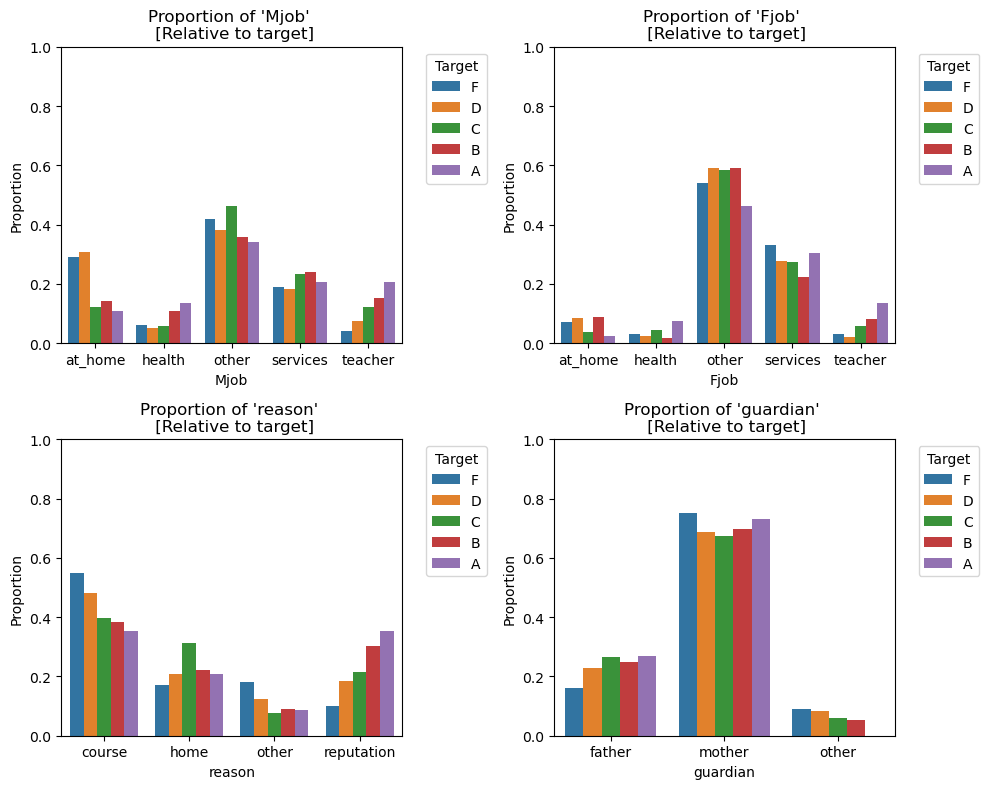

In [6]:

# Create a grid of subplots for feature columns)
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

# Loop through each feature column (except 'Target')
for ax, col in zip(axes, df_cat[:-1]):
    # Group by 'Target' and the current feature to get counts
    grouped = df.groupby(['Target', col]).size().reset_index(name="count")
    
    # Calculate total counts for each 'Target'
    Target_totals = df.groupby('Target').size().reset_index(name="total")
    
    # Merge totals into the grouped DataFrame
    merged = pd.merge(grouped, Target_totals, on='Target')
    
    # Compute proportion relative to the total count of each Target
    merged["prop"] = merged["count"] / merged["total"]
    
    # Create a bar plot: x-axis shows the feature categories, y-axis shows the proportion,
    # and bars are colored by 'Target'
    sns.barplot(y="prop", x=col, hue="Target", data=merged, ax=ax)
    ax.set_title(f"Proportion of '{col}' \n [Relative to target]")
    ax.set_ylabel("Proportion")
    ax.set_ylim(0, 1)
    ax.legend(title="Target", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### Binary

/var/folders/tz/gs_7p8rj7tz_vx4snsdf_c2m0000gp/T/ipykernel_5479/1821568147.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['Target', col]).size().reset_index(name="count")
/var/folders/tz/gs_7p8rj7tz_vx4snsdf_c2m0000gp/T/ipykernel_5479/1821568147.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Target_totals = df.groupby('Target').size().reset_index(name="total")
/var/folders/tz/gs_7p8rj7tz_vx4snsdf_c2m0000gp/T/ipykernel_5479/1821568147.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False t

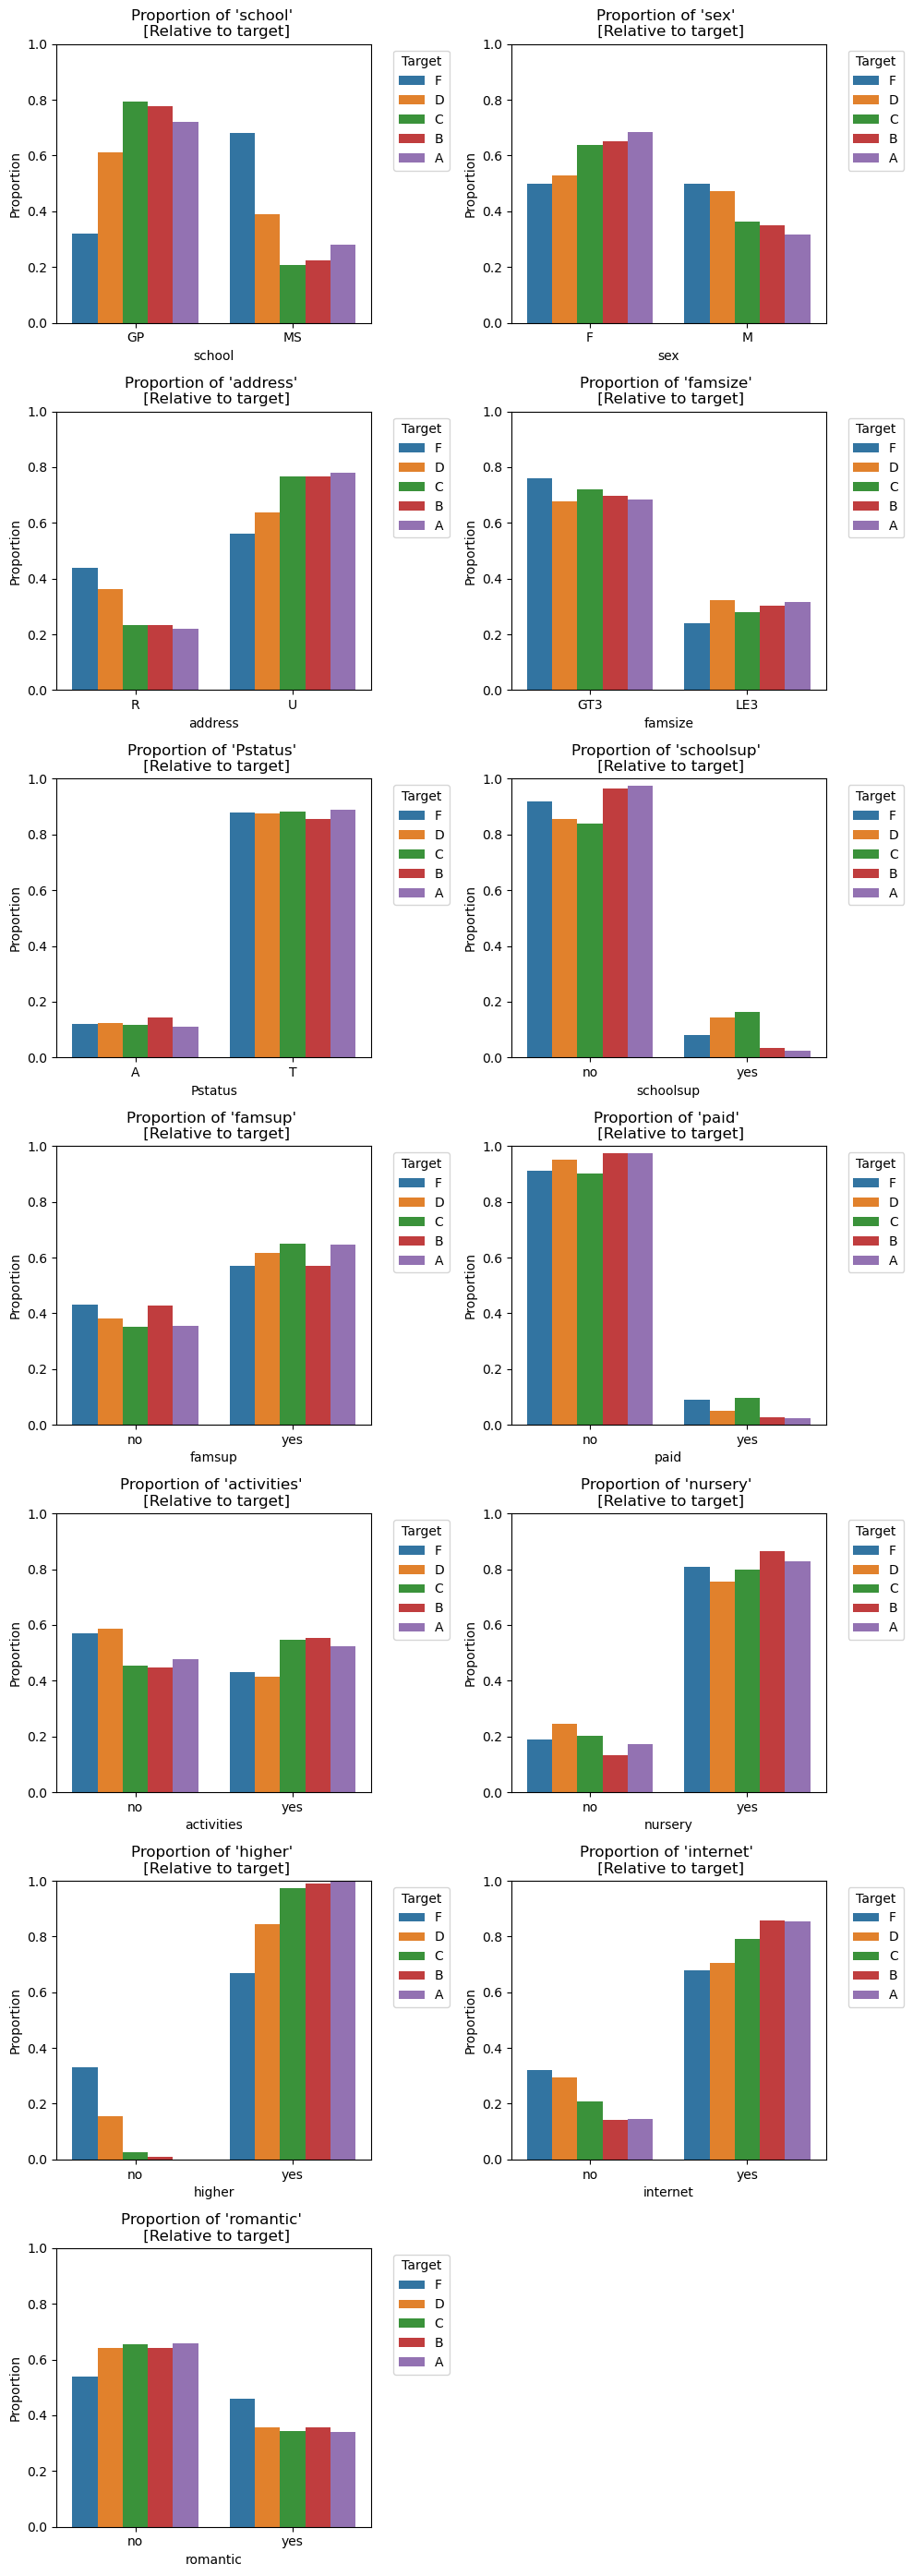

In [7]:

# Create a grid of subplots for feature columns)
fig, axes = plt.subplots(7, 2, figsize=(10, 28))
axes = axes.flatten()

# Loop through each feature column (except 'Target')
for ax, col in zip(axes, df_bin.columns[:-1]):
    # Group by 'Target' and the current feature to get counts
    grouped = df.groupby(['Target', col]).size().reset_index(name="count")
    
    # Calculate total counts for each 'Target'
    Target_totals = df.groupby('Target').size().reset_index(name="total")
    
    # Merge totals into the grouped DataFrame
    merged = pd.merge(grouped, Target_totals, on='Target')
    
    # Compute proportion relative to the total count of each Target
    merged["prop"] = merged["count"] / merged["total"]
    
    # Create a bar plot: x-axis shows the feature categories, y-axis shows the proportion,
    # and bars are colored by 'Target'
    sns.barplot(y="prop", x=col, hue="Target", data=merged, ax=ax)
    ax.set_title(f"Proportion of '{col}' \n [Relative to target]")
    ax.set_ylabel("Proportion")
    ax.set_ylim(0, 1)
    ax.legend(title="Target", bbox_to_anchor=(1.05, 1), loc='upper left')

# Hide unused subplots
for ax in axes[13:]:
    ax.set_visible(False)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### Ordinal

/var/folders/tz/gs_7p8rj7tz_vx4snsdf_c2m0000gp/T/ipykernel_5479/2079584874.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['Target', col]).size().reset_index(name="count")
/var/folders/tz/gs_7p8rj7tz_vx4snsdf_c2m0000gp/T/ipykernel_5479/2079584874.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Target_totals = df.groupby('Target').size().reset_index(name="total")
/var/folders/tz/gs_7p8rj7tz_vx4snsdf_c2m0000gp/T/ipykernel_5479/2079584874.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False t

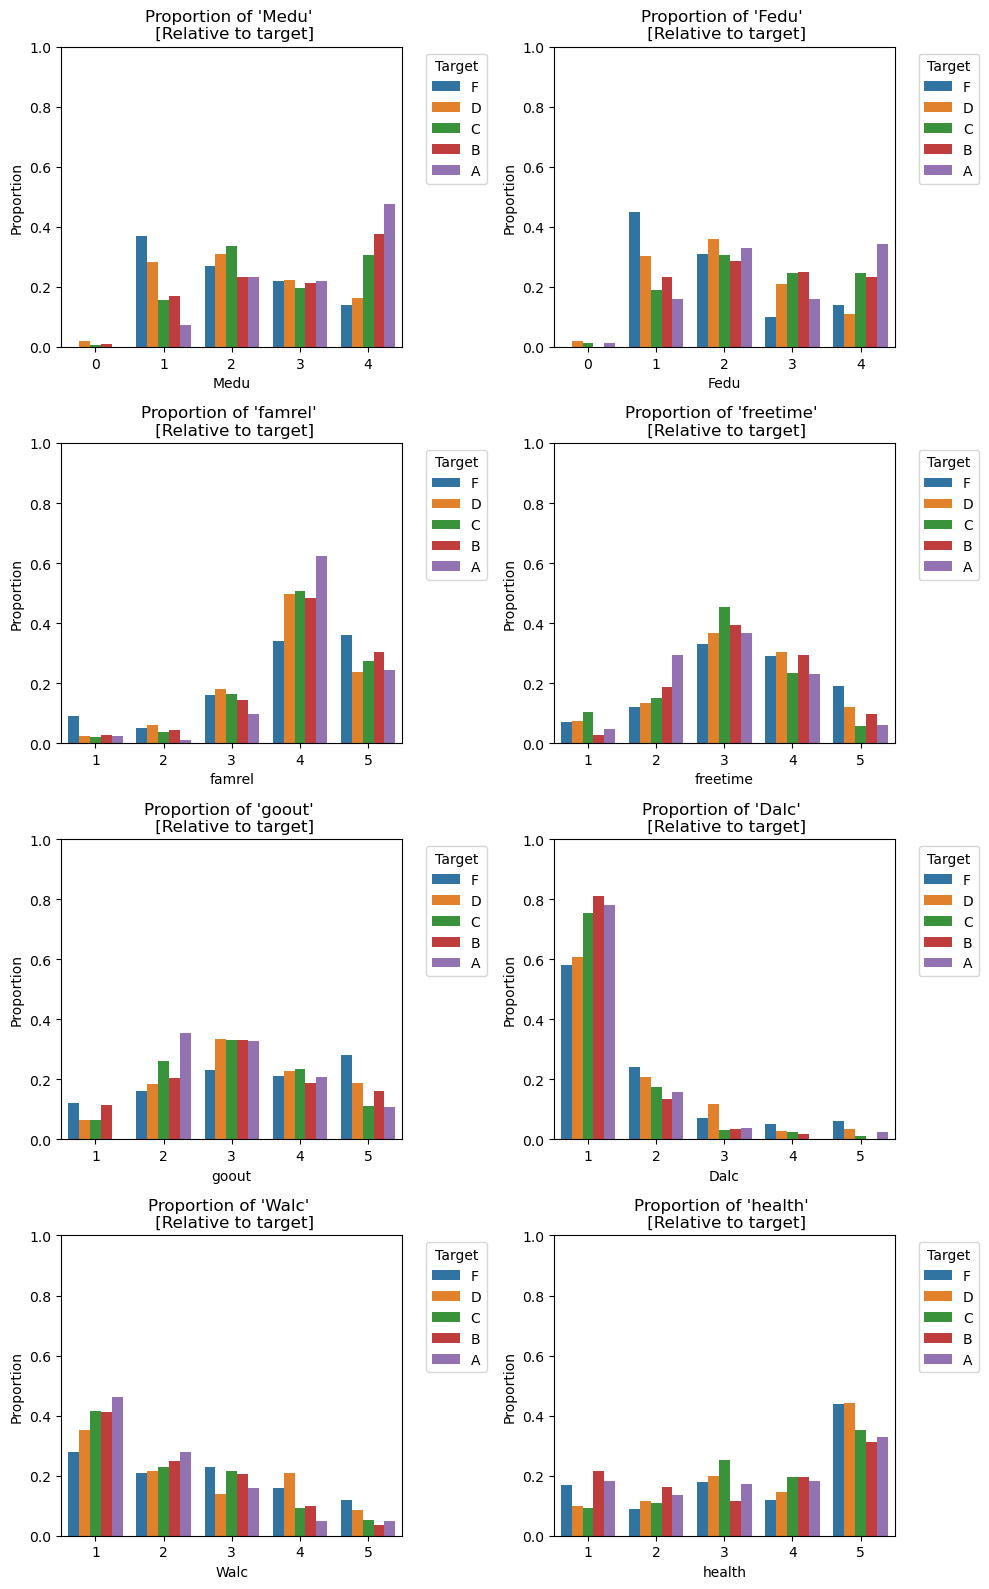

In [8]:

# Create a grid of subplots for feature columns)
fig, axes = plt.subplots(4, 2, figsize=(10, 16))
axes = axes.flatten()

# Loop through each feature column (except 'Target')
for ax, col in zip(axes, df_ord.columns[:-1]):
    # Group by 'Target' and the current feature to get counts
    grouped = df.groupby(['Target', col]).size().reset_index(name="count")
    
    # Calculate total counts for each 'Target'
    Target_totals = df.groupby('Target').size().reset_index(name="total")
    
    # Merge totals into the grouped DataFrame
    merged = pd.merge(grouped, Target_totals, on='Target')
    
    # Compute proportion relative to the total count of each Target
    merged["prop"] = merged["count"] / merged["total"]
    
    # Create a bar plot: x-axis shows the feature categories, y-axis shows the proportion,
    # and bars are colored by 'Target'
    sns.barplot(y="prop", x=col, hue="Target", data=merged, ax=ax)
    ax.set_title(f"Proportion of '{col}' \n [Relative to target]")
    ax.set_ylabel("Proportion")
    ax.set_ylim(0, 1)
    ax.legend(title="Target", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### Continuous variables

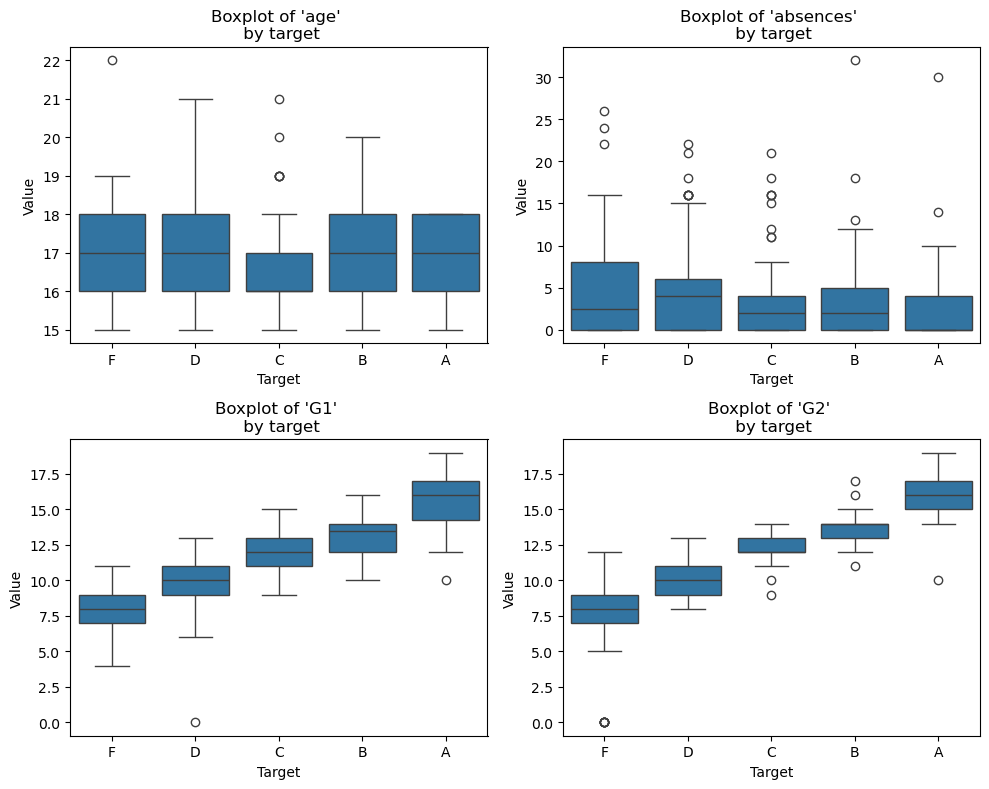

In [9]:
# Create a grid of subplots for feature columns)
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

# Loop through each feature column (except 'Target')
for ax, col in zip(axes, df_num.columns[:-1]):

    # Create a box plot: x-axis shows the feature categories, y-axis shows the proportion,
    # and box are colored by 'Target'
    sns.boxplot(x='Target', y=col, data=df_num, ax=ax)
    ax.set_title(f"Boxplot of '{col}' \n by target")
    ax.set_ylabel("Value")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

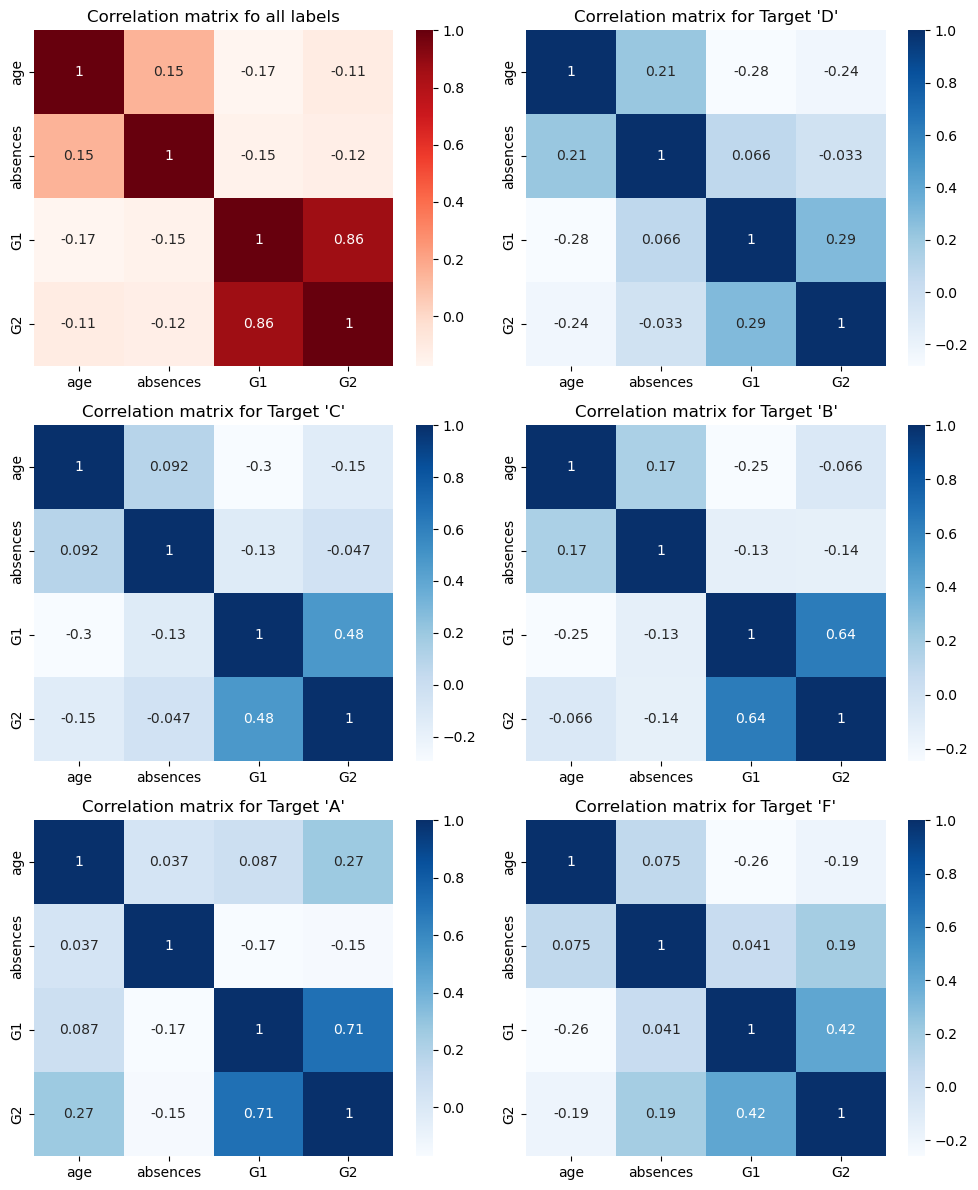

In [10]:
# Create a grid of subplots for feature columns
fig, axes = plt.subplots(3, 2, figsize=(10, 12))
axes = axes.flatten()

df_corr = df_num.drop(columns=['Target'])
corr_matrix = df_corr.corr()
sns.heatmap(corr_matrix, annot=True, cmap='Reds', ax=axes[0])
axes[0].set_title(f"Correlation matrix fo all labels")

# Loop through each feature column (except 'Target')
for i, lab in enumerate(df_num['Target'].unique()[:len(axes)-1], start=1):
    # Filter the dataframe based on the current label
    df_corr = df_num[df_num['Target'] == lab].drop(columns=['Target'])
    corr_matrix = df_corr.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='Blues', ax=axes[i])
    axes[i].set_title(f"Correlation matrix for Target '{lab}'")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

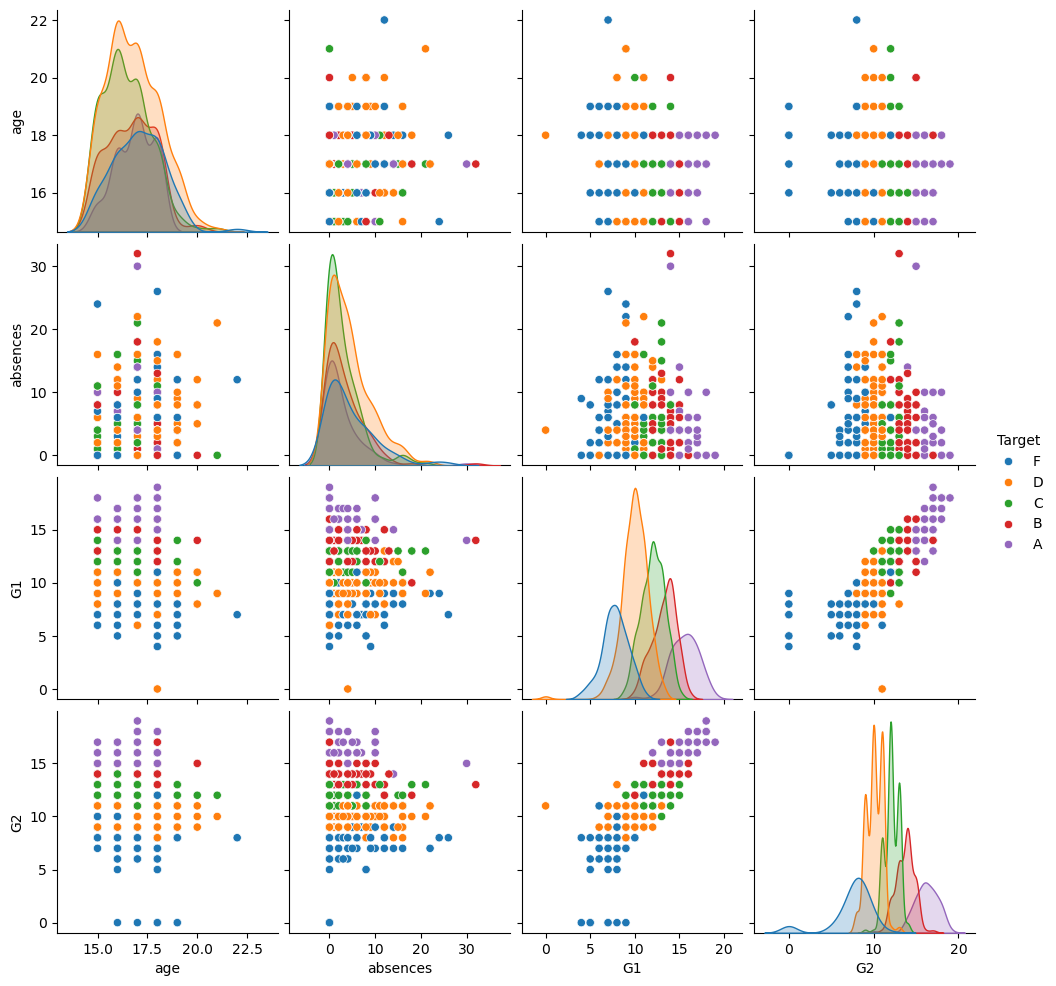

In [11]:
# Focus on variables with high correlations
df_num_scat = df_num.copy()

# Create a matrix of subplots for feature columns
plt.figure(figsize=(15, 10))
sns.pairplot(df_num_scat, hue='Target', diag_kind='kde')
plt.show()

<Figure size 1500x1000 with 0 Axes>

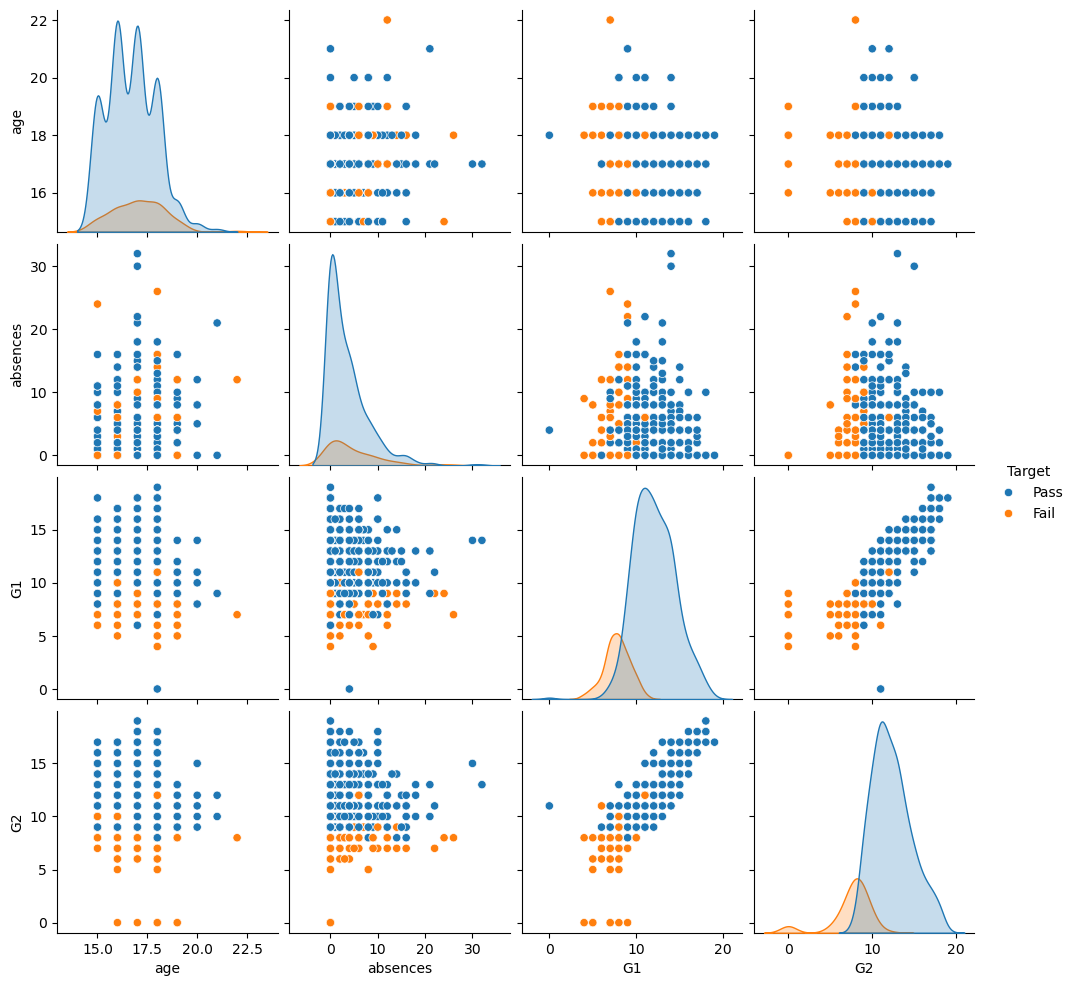

In [12]:
# Focus on variables with high correlations
df_num_scat['Target'] = df_num_scat['Target'].apply(lambda x: "Fail" if x == 'F' else "Pass")

# Create a matrix of subplots for feature columns
plt.figure(figsize=(15, 10))
sns.pairplot(df_num_scat, hue='Target', diag_kind='kde')
plt.show()

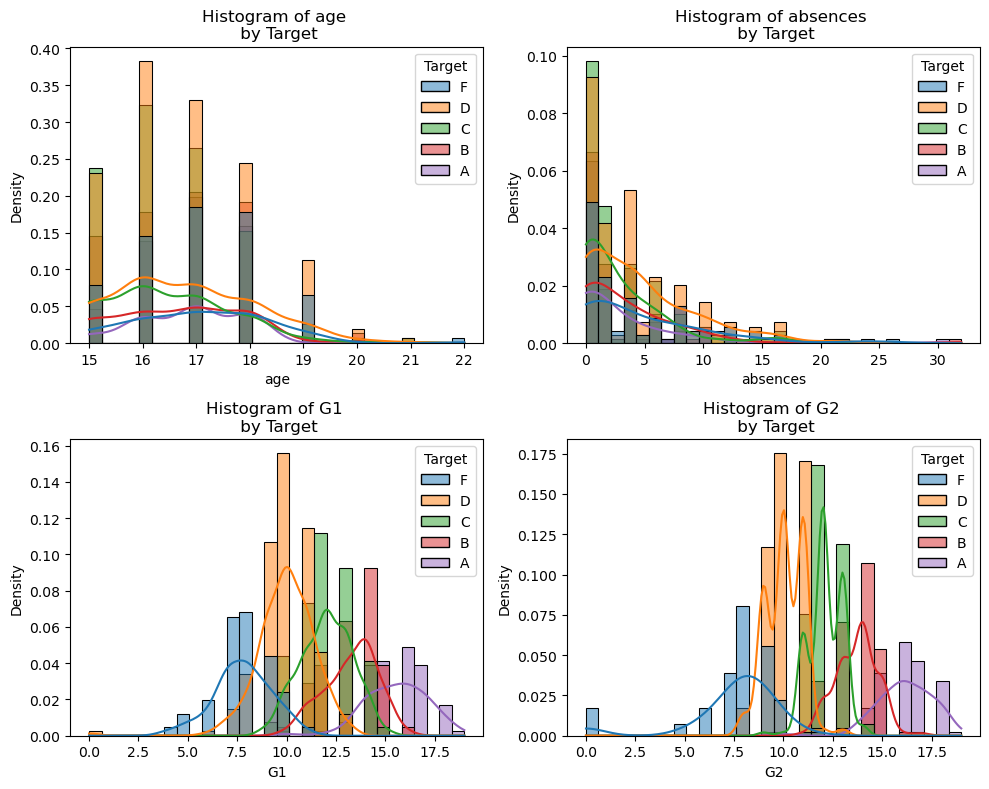

In [13]:
# Create a grid of subplots for feature columns
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

#Create histograms for each feature column
for ax, col in zip(axes, df_num.columns[:-1]):
    sns.histplot(data=df_num, x=col, hue='Target', kde=True, bins=30, ax=ax, stat='density')
    ax.set_title(f'Histogram of {col} \n by Target')
    ax.set_ylabel("Density")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

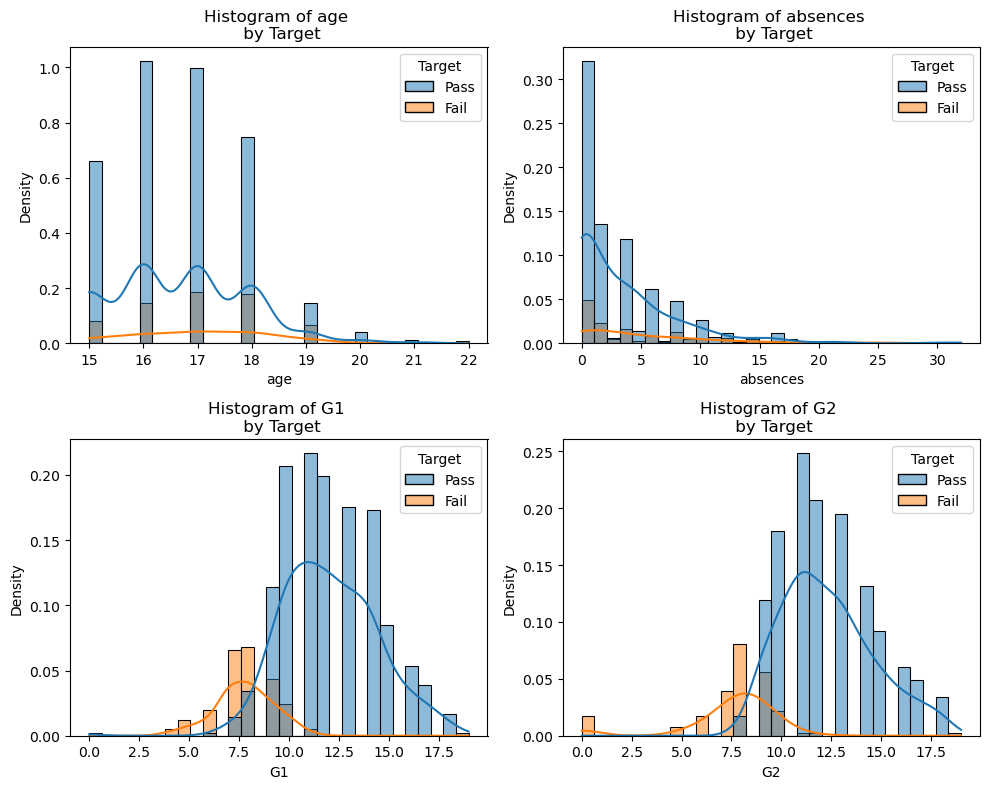

In [14]:
df_num2 = df_num.copy()
df_num2['Target'] = df_num2['Target'].apply(lambda x: 'Fail' if x == 'F' else 'Pass')

# Create a grid of subplots for feature columns
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

#Create histograms for each feature column
for ax, col in zip(axes, df_num.columns[:-1]):
    sns.histplot(data=df_num2, x=col, hue='Target', kde=True, bins=30, ax=ax, stat='density')
    ax.set_title(f'Histogram of {col} \n by Target')
    ax.set_ylabel("Density")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## Notable findings

The proportion of examples on the label is imbalance. Resampling may be appropriate. In terms of features, there categories that provided a clear contrast between G3 grades such as Mother and Father education level. Notably, strong correlation exist between G1 and G2 grades with observable segregation between G3 letter grades implying these features would provide our expected clusters. G1 and G2 will be use further into the clustering process.

# Preprocessing

Encode data base on its type and perform balance split data stratified by the labels with 70% allocated to training, and 30% for testing.

In [15]:
# Create feature and label for clustering
x = df[['G1', 'G2']].to_numpy()
y = df['Target'].to_numpy()

unique_labels = np.unique(y)

palette = {
    unique_labels[0]: 'blue',
    unique_labels[1]: 'green',
    unique_labels[2]: 'orange',
    unique_labels[3]: 'red',
    unique_labels[4]: 'purple'
}

# K means clustering

## Training

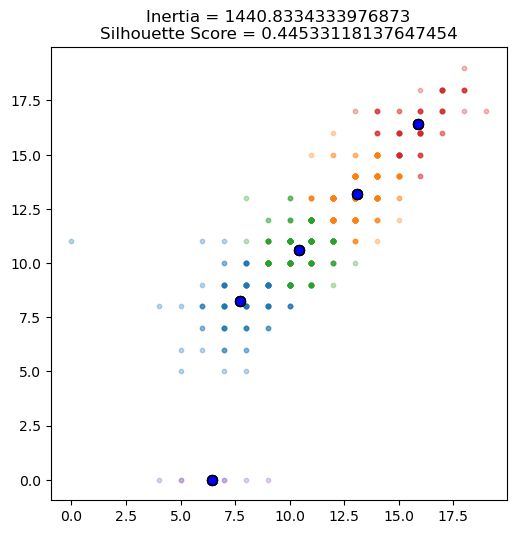

In [16]:
inertia_values = []
silhouette_avgs = []
i=5
fig2 = plt.figure(figsize=(20,20))
kmeans = KMeans(n_clusters=i, n_init=10).fit(x)
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia_values.append(kmeans.inertia_)
silhouette_avg = silhouette_score(x, cluster_labels)
silhouette_avgs.append(silhouette_avg)
ax = fig2.add_subplot(330 + i - 1)
for j in range(0,i):
    ax.scatter(x[cluster_labels == j,0], x[cluster_labels == j,1], s=10, alpha=0.3)
    ax.scatter(centroids[:,0],centroids[:,1], s=50, color='b', edgecolor='k')
    ax.set_title(f"Inertia = {kmeans.inertia_}\nSilhouette Score = {silhouette_avg}")

## Compare clusters and labels

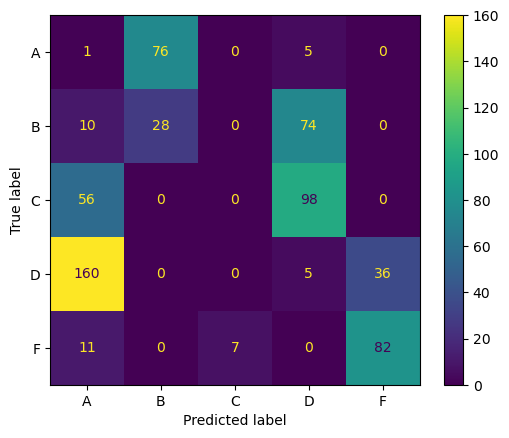

In [17]:
# Predict the clusters
y_pred = kmeans.fit_predict(x)

# Convert the labels to the same type
y_test_str = y.astype(str)
y_pred_str = y_pred.astype(str)

# Map cluster labels to target labels
unique_labels = np.unique(y_test_str)
label_mapping = {i: unique_labels[i] for i in range(len(unique_labels))}
y_pred_mapped = np.vectorize(label_mapping.get)(y_pred)

# Compute the confusion matrix
cfm = confusion_matrix(y_test_str, y_pred_mapped)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(cfm, display_labels=unique_labels)
disp.plot()
plt.show()

# Agglomerative models

## Training

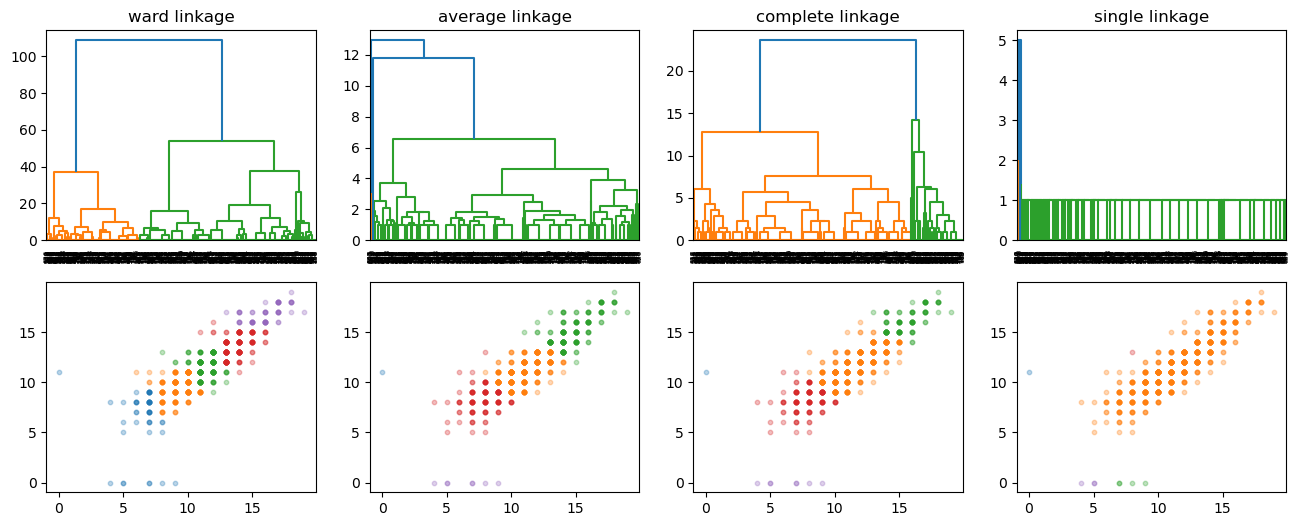

Elapsed Time: 25.032330989837646 sec


In [18]:
fig3 = plt.figure(figsize=(16,6))
ctr = 1
t0 = time()
for method in ('ward', 'average', 'complete', 'single'):
    Z = linkage(x, method=method)
    ax = fig3.add_subplot(240 + ctr)
    ax.set_title("%s linkage" % method)
    dendrogram(Z)
    cutree = cut_tree(Z, n_clusters=5).flatten()
    ax = fig3.add_subplot(240 + ctr + 4)
    for j in range(0,5):
        ax.scatter(x[cutree == j,0], x[cutree == j,1], s=10, alpha=0.3)
    ctr += 1

plt.show()
print(f"Elapsed Time: {time()-t0} sec")

## Compare clusters and labels

### Ward linkage

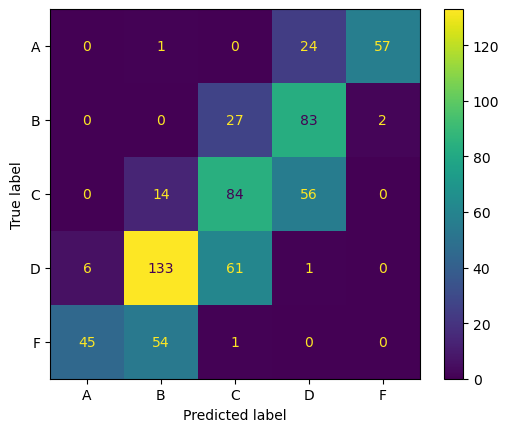

In [19]:
ward = linkage(x, method='ward')
cutree = cut_tree(ward, n_clusters=5).flatten()
y_test_str = y.astype(str)
y_pred_mapped = np.vectorize(label_mapping.get)(cutree)
cfm = confusion_matrix(y_test_str, y_pred_mapped)
disp = ConfusionMatrixDisplay(cfm, display_labels=unique_labels)
disp.plot()
plt.show()

### Average linkage

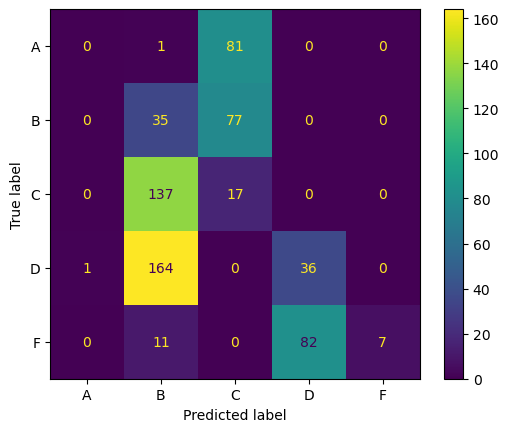

In [20]:
average = linkage(x, method='average')
cutree = cut_tree(average, n_clusters=5).flatten()
y_test_str = y.astype(str)
y_pred_mapped = np.vectorize(label_mapping.get)(cutree)
cfm = confusion_matrix(y_test_str, y_pred_mapped)
disp = ConfusionMatrixDisplay(cfm, display_labels=unique_labels)
disp.plot()
plt.show()

### Complete linkage

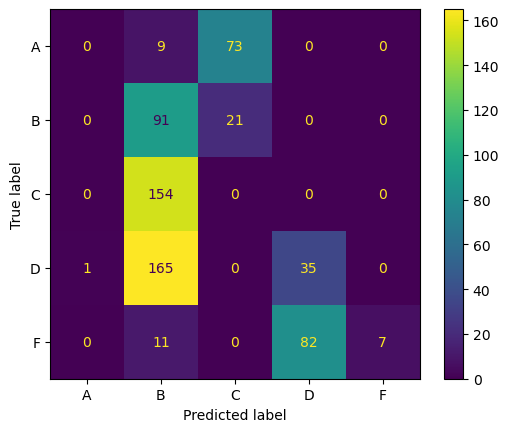

In [21]:
complete = linkage(x, method='complete')
cutree = cut_tree(complete, n_clusters=5).flatten()
y_test_str = y.astype(str)
y_pred_mapped = np.vectorize(label_mapping.get)(cutree)
cfm = confusion_matrix(y_test_str, y_pred_mapped)
disp = ConfusionMatrixDisplay(cfm, display_labels=unique_labels)
disp.plot()
plt.show()

### Single linkage

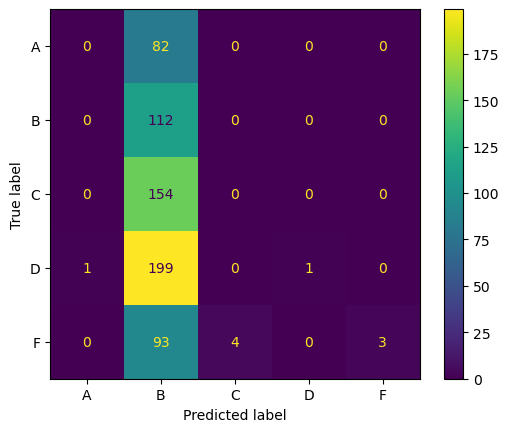

In [22]:
single = linkage(x, method='single')
cutree = cut_tree(single, n_clusters=5).flatten()
y_test_str = y.astype(str)
y_pred_mapped = np.vectorize(label_mapping.get)(cutree)
cfm = confusion_matrix(y_test_str, y_pred_mapped)
disp = ConfusionMatrixDisplay(cfm, display_labels=unique_labels)
disp.plot()
plt.show()

# Conclusion

As a result, it seems that the models were not able to replicate the lables as cluster. Based on the visualization of clusters and actual labels, the large range for letter grade 'F', small difference between letter grade 'A' to 'D', and large overlap of G1 and G2 values in relation to each letter grade became a major challenge. Different models may be explored or a supervise model may be more appropriate for the given task.